In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
plt.gray();

import sklearn
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import AdaBoostClassifier as AdaBoost


from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

<Figure size 432x288 with 0 Axes>

In [4]:
def show_dataset(X, N, max_size=400):

    plt.figure(figsize=(20, 20))
    for i, f in enumerate(X[:max_size]):
        plt.subplot(20, 20, i + 1)

        plt.imshow(f.reshape((N, N)), vmax=1)

        plt.axis('off')

    plt.show()

# dataset

In [5]:
dataset = fetch_olivetti_faces(shuffle=False)
X = dataset.data
print(X.shape[0]) # number of samples

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\shuto\scikit_learn_data
400


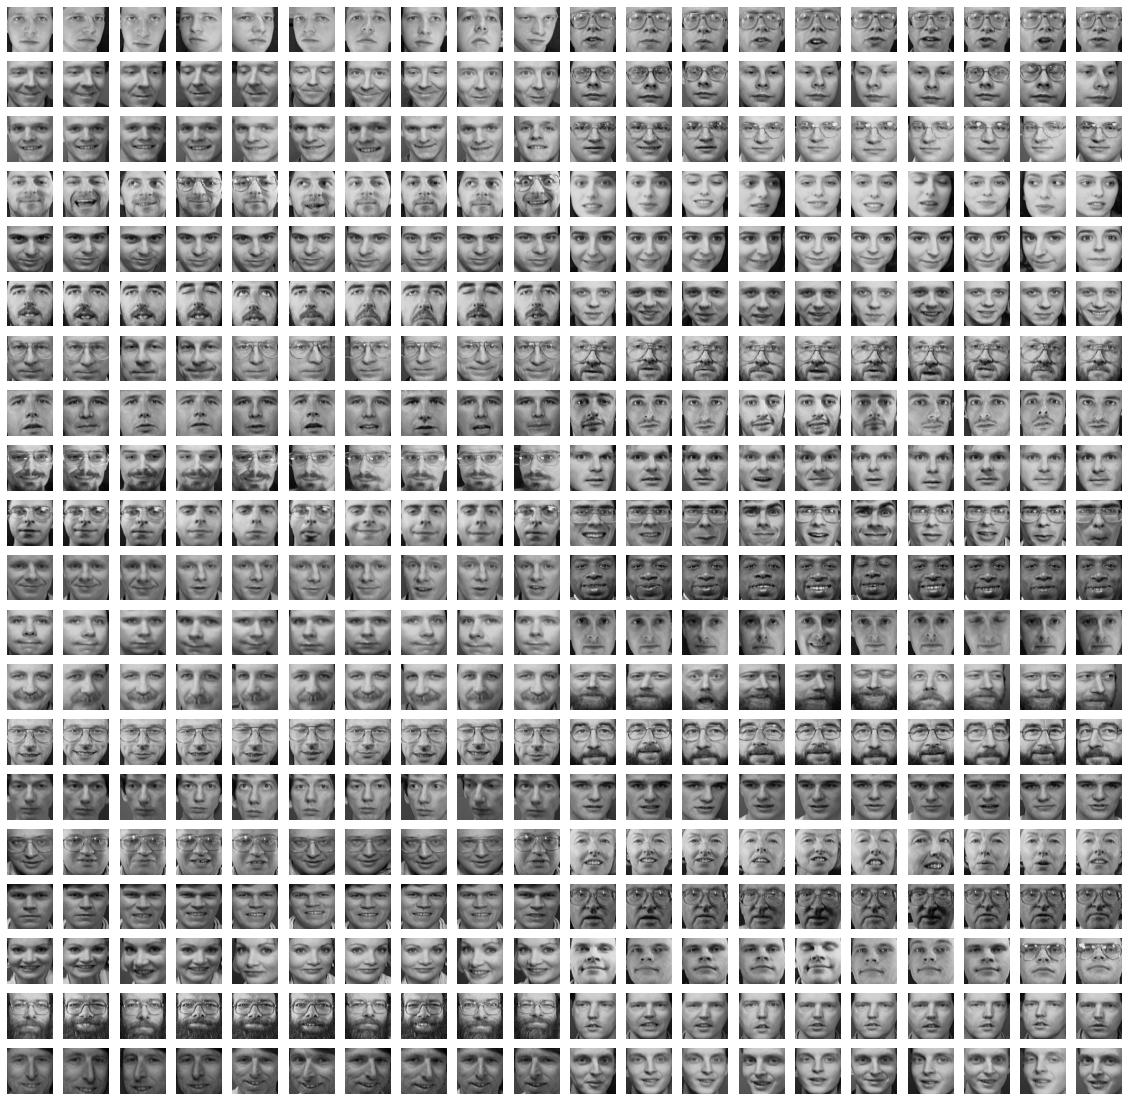

In [6]:
show_dataset(X, N=64)

In [7]:
y = dataset.target # ラベル
print(y)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

学習セットとテストセットの分割

In [8]:
ss = StratifiedShuffleSplit(n_splits=1,      # 分割を1個生成
                            train_size=0.5,  # 学習は半分
                            test_size=0.5)   # テストも半分

In [9]:
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

# kNN

In [10]:
k_vals = [1, 2, 3, 10]
clfs = {}

for k in k_vals:
    
    clf = kNN(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    clfs[k] = clf
    print(k, 'training accuracy', clf.score(X_train, y_train))
    print(k, 'test     accuracy', clf.score(X_test, y_test))

1 training accuracy 1.0
1 test     accuracy 0.855
2 training accuracy 0.9
2 test     accuracy 0.81
3 training accuracy 0.9
3 test     accuracy 0.785
10 training accuracy 0.7
10 test     accuracy 0.55


In [ ]:
@interact(sample=(0, len(y)-1, 1),
          k=(1, 3, 1)
         )
def g(sample=0, k=1):
    
    imshow(X[sample].reshape(64,64), vmin=0, vmax=1)
    clf = clfs[k]
    y_pred = clf.predict(X[sample, np.newaxis])[0]
    
    istrain = 'train' if sample in train_index else 'test'
    
    plt.axis('off')
    plt.title('{2}: true {0} predict {1}'.format(y[sample], y_pred, istrain))

# SVM

In [ ]:
kernels = ['linear', 'poly', 'rbf']
clfs = {}

for kernel in kernels:
    
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
    clfs[kernel] = clf
    print(kernel, 'training accuracy', clf.score(X_train, y_train))
    print(kernel, 'test     accuracy', clf.score(X_test, y_test))

In [ ]:
@interact(sample=(0, len(y)-1, 1),
          kernel=RadioButtons(options=kernels)
         )
def g(sample=0, kernel='linear'):
    
    imshow(X[sample].reshape(64,64), vmin=0, vmax=1)
    clf = clfs[kernel]
    y_pred = clf.predict(X[sample, np.newaxis])[0]
    
    istrain = 'train' if sample in train_index else 'test'
    
    plt.axis('off')
    plt.title('{2}: true {0} predict {1}'.format(y[sample], y_pred, istrain))

# Random Forest

In [ ]:
n_vals = [10, 100, 500, 1000]
clfs = {}

for n in n_vals:
    
    clf = RandomForest(n_estimators=n)
    clf.fit(X_train, y_train)
    
    clfs[n] = clf
    print(n, 'training accuracy', clf.score(X_train, y_train))
    print(n, 'test     accuracy', clf.score(X_test, y_test))

In [ ]:
@interact(sample=(0, len(y)-1, 1),
          n=RadioButtons(options=n_vals)
         )
def g(sample=0, n=100):
    
    imshow(X[sample].reshape(64,64), vmin=0, vmax=1)
    clf = clfs[n]
    y_pred = clf.predict(X[sample, np.newaxis])[0]
    
    istrain = 'train' if sample in train_index else 'test'
    
    plt.axis('off')
    plt.title('{2}: true {0} predict {1}'.format(y[sample], y_pred, istrain))

# AdaBoost

In [ ]:
n_vals = [10, 100, 200]
clfs = {}

for n in n_vals:
    
#     clf = AdaBoost(n_estimators=n)
    clf = AdaBoost(n_estimators=n, learning_rate=0.01)
    clf.fit(X_train, y_train)
    
    clfs[n] = clf
    print(n, 'training accuracy', clf.score(X_train, y_train))
    print(n, 'test     accuracy', clf.score(X_test, y_test))

In [ ]:
@interact(sample=(0, len(y)-1, 1),
          n=RadioButtons(options=n_vals)
         )
def g(sample=0, n=100):
    
    imshow(X[sample].reshape(64,64), vmin=0, vmax=1)
    clf = clfs[n]
    y_pred = clf.predict(X[sample, np.newaxis])[0]
    
    istrain = 'train' if sample in train_index else 'test'
    
    plt.axis('off')
    plt.title('{2}: true {0} predict {1}'.format(y[sample], y_pred, istrain))